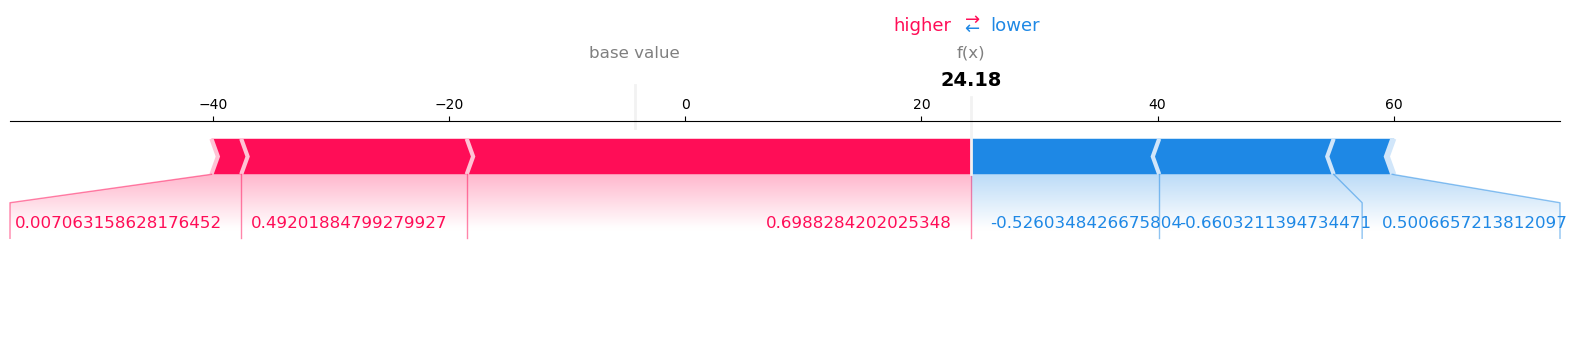

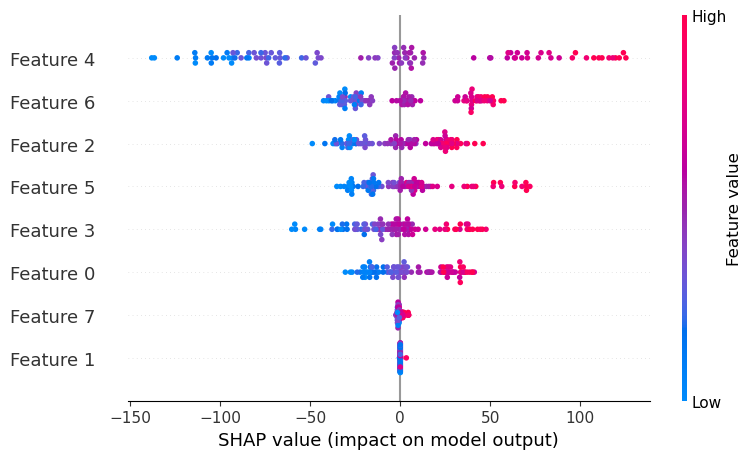

In [2]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic regression dataset (lighter than California housing)
X, y = make_regression(n_samples=500, n_features=8, noise=0.1, random_state=42)
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Train a simple XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(n_estimators=30, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# --- Force plot for a single observation ---
single_instance = 0
force_plot = shap.plots.force(shap_values[single_instance], matplotlib=True, show=False)
plt.show()

# --- Beeswarm plot for global explanation ---
plt.figure(figsize=(8,5))
shap.plots.beeswarm(shap_values, show=False)
plt.tight_layout()
plt.show()